## 1. Setups

### 1.1 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
sys.path.insert(1, '../src')
from load_data import load_data

### 1.2 Some hyperparameters

- 'LABELS': The labels corresponding to normal and pneumonia (virus and bacteria)
- 'IMG_SIZE': The reshaped image size

In [2]:
LABELS = ['opacity', 'normal']
IMG_SIZE = 128

### 1.3 Load the data

In [3]:
X_train, y_train = load_data('../data/train', LABELS, IMG_SIZE)
X_val, y_val = load_data('../data/val', LABELS, IMG_SIZE)
X_test, y_test = load_data('../data/test', LABELS, IMG_SIZE)

../src\load_data.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  labelled_data = np.array(data)


#### 1.3.1 Sanity check

In [4]:
assert sum(np.array(y_train) == 0) == 1082
assert sum(np.array(y_train) == 1) + sum(np.array(y_train) == 2) == 3110

In [5]:
assert sum(np.array(y_val) == 0) == 267
assert sum(np.array(y_val) == 1) + sum(np.array(y_val) == 2) == 773

In [6]:
assert sum(np.array(y_test) == 0) == 234
assert sum(np.array(y_test) == 1) + sum(np.array(y_test) == 2) == 390

## 2. EDA

### 2.1 Some basic statistics

In [7]:
print('Train set:')
print(f'  - The number of normal in train set is {sum(np.array(y_train) == 0)}.')
print(f'  - The number of pneumonia cause by virus in train set is {sum(np.array(y_train) == 1)}.')
print(f'  - The number of pneumonia cause by bacteria in train set is {sum(np.array(y_train) == 2)}.')
print(' ')
print('Validation set:')
print(f'  - The number of normal in validation set is {sum(np.array(y_val) == 0)}.')
print(f'  - The number of pneumonia cause by virus in validation set is {sum(np.array(y_val) == 1)}.')
print(f'  - The number of pneumonia cause by bacteria in validation set is {sum(np.array(y_val) == 2)}.')
print(' ')
print('Test set:')
print(f'  - The number of normal in test set is {sum(np.array(y_test) == 0)}.')
print(f'  - The number of pneumonia cause by virus in test set is {sum(np.array(y_test) == 1)}.')
print(f'  - The number of pneumonia cause by bacteria in test set is {sum(np.array(y_test) == 2)}.')

Train set:
  - The number of normal in train set is 1082.
  - The number of pneumonia cause by virus in train set is 1170.
  - The number of pneumonia cause by bacteria in train set is 1940.
 
Validation set:
  - The number of normal in validation set is 267.
  - The number of pneumonia cause by virus in validation set is 175.
  - The number of pneumonia cause by bacteria in validation set is 598.
 
Test set:
  - The number of normal in test set is 234.
  - The number of pneumonia cause by virus in test set is 148.
  - The number of pneumonia cause by bacteria in test set is 242.


### 2.2 Randomly show some X-rays from the training set

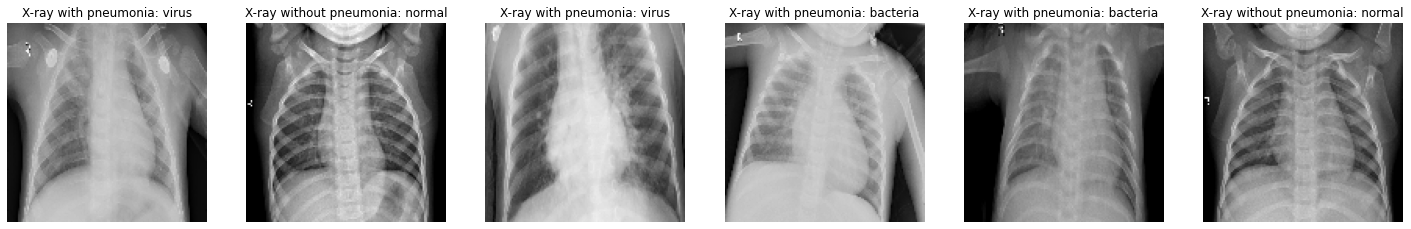

In [9]:
label_dict = {0: 'normal', 1: 'virus', 2: 'bacteria'}
num_img = 6
fig, subplots = plt.subplots(1, num_img)
fig.set_size_inches(25, 5)
for i in range(num_img):
    ind = np.random.randint(0, len(X_train))
    num = y_train[ind]
    word = "out" if num == 0 else "" 
    
    subplots[i].imshow(X_train[ind].reshape((IMG_SIZE, IMG_SIZE)), cmap='gray')
    subplots[i].set_title(f'X-ray with{word} pneumonia: {label_dict[num]}')
    subplots[i].axis('off')
plt.show()